In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [80]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 품목: 배추

In [81]:
#데이터 불러오기
cab = pd.read_csv("C:/Users/keogu/Desktop/빅데이터 자료분석/new data/배추.csv",parse_dates=['SALEDATE'])

In [82]:
cab.head()

,PUM_NM,LV_NM,TOT_AMT,SAN_NM,SALEDATE,CMP_NM,DAN_NM,WHSAL_NM,SIZE_NM,COST,POJ_NM,TOT_QTY,QTY,KIND_NM,DANQ
0,배추,특,80000.0,경기도 광주시,2014-01-03,한국청과,kg,서울가락도매,.,3200.0,상자,25.0,25.0,쌈배추,1.0
1,배추,특,77500.0,경기도 광주시,2014-01-03,한국청과,kg,서울가락도매,.,3100.0,상자,25.0,25.0,쌈배추,1.0
2,배추,특,75000.0,경기도 광주시,2014-01-03,한국청과,kg,서울가락도매,.,3000.0,상자,25.0,25.0,쌈배추,1.0
3,배추,특,145700.0,서울특별시,2014-01-03,한국청과,kg,서울가락도매,.,4700.0,상자,31.0,31.0,쌈배추,1.0
4,배추,특,138000.0,서울특별시,2014-01-03,한국청과,kg,서울가락도매,.,4600.0,상자,30.0,30.0,쌈배추,1.0


In [83]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784235 entries, 0 to 2784234
Data columns (total 15 columns):
 #   Column    Dtype         
---  ------    -----         
 0   PUM_NM    object        
 1   LV_NM     object        
 2   TOT_AMT   float64       
 3   SAN_NM    object        
 4   SALEDATE  datetime64[ns]
 5   CMP_NM    object        
 6   DAN_NM    object        
 7   WHSAL_NM  object        
 8   SIZE_NM   object        
 9   COST      float64       
 10  POJ_NM    object        
 11  TOT_QTY   float64       
 12  QTY       float64       
 13  KIND_NM   object        
 14  DANQ      float64       
dtypes: datetime64[ns](1), float64(5), object(9)
memory usage: 318.6+ MB


# 전처리

## 필요없는 컬럼 삭제  
**필요없는 칼럼**
- PUM_NM: 품목
- LV_NM: 등급  
- CMP_NM: 법인
- DAN_NM: 단위
- WHSAL_NM: 도매시장 
- SIZE_NM: 크기
- COST: 단가
- POJ_NM: 포장 
- QTY: 물량
- KIND_NM: 품종 
- DANQ: 단위물량

In [84]:
# 필요없는 칼럼 삭제
cab.drop(columns=['CMP_NM','WHSAL_NM','POJ_NM','KIND_NM','PUM_NM','LV_NM','SIZE_NM','QTY','DANQ','COST','DAN_NM'], axis=1, inplace=True)

**남은 컬럼**
- TOT_AMT: 총 금액
- SAN_NM: 산지
- SALEDATE: 경락 일자   
- TOT_QTY:총 물량

## 총 금액 / 총 물량 

### 거래 취소 데이터 제거  
- 총 금액, 총 물량 음수거나 0인 데이터 제거

In [85]:
# 43406건
cab[(cab['TOT_AMT'] <= 0)|(cab['TOT_QTY'] <= 0)]

,TOT_AMT,SAN_NM,SALEDATE,TOT_QTY
288,-2952000.0,전라남도 해남군,2014-01-03,-7200.0
291,-442800.0,전라남도 해남군,2014-01-03,-1800.0
297,0.0,전라남도 해남군,2014-01-04,1800.0
298,0.0,전라남도 해남군,2014-01-04,7200.0
355,-199500.0,전라남도 해남군,2014-01-04,-700.0
...,...,...,...,...
2783518,0.0,경기도 연천군,2021-10-30,30.0
2783521,0.0,경기도 연천군,2021-10-30,20.0
2783589,0.0,경상북도 문경시,2021-10-30,50.0
2783593,0.0,경상북도 문경시,2021-10-30,20.0


In [86]:
#제거
drop_index = cab[(cab['TOT_AMT'] <= 0)|(cab['TOT_QTY'] <= 0)].index
cab.drop(index = drop_index, axis=0, inplace=True)

### 이상치 제거  
- 단위 당 가격이 너무 높은 금액 제거  
- 특별한 제거 기준이 없어서 애매(?)

In [87]:
#단위 당 가격 칼럼 생성
cab['PER_WEEK'] = cab['TOT_AMT']/cab['TOT_QTY']

In [88]:
cab.head()

,TOT_AMT,SAN_NM,SALEDATE,TOT_QTY,PER_WEEK
0,80000.0,경기도 광주시,2014-01-03,25.0,3200.0
1,77500.0,경기도 광주시,2014-01-03,25.0,3100.0
2,75000.0,경기도 광주시,2014-01-03,25.0,3000.0
3,145700.0,서울특별시,2014-01-03,31.0,4700.0
4,138000.0,서울특별시,2014-01-03,30.0,4600.0


In [89]:
cab.describe()

,TOT_AMT,TOT_QTY,PER_WEEK
count,2.740829e+06,2.740829e+06,2.740829e+06
mean,6.237625e+05,1.001398e+03,1.708457e+03
std,1.408759e+06,1.992387e+03,1.589503e+04
min,6.400000e+01,1.000000e-02,1.111358e-01
25%,7.200000e+04,5.200000e+01,4.200000e+02
50%,2.060000e+05,2.800000e+02,8.050000e+02
75%,5.400000e+05,9.500000e+02,1.625000e+03
max,2.083360e+08,5.103000e+05,1.525443e+07


In [90]:
# 단위 당 가격 50000원 이상 1293건
# 단위 당 가격 30000원 이상 4168건
# 단위 당 가격 30000원 이상 24045건
cab[cab['PER_WEEK'] > 50000]

,TOT_AMT,SAN_NM,SALEDATE,TOT_QTY,PER_WEEK
195756,65000.0,서울특별시,2016-01-07,1.0,65000.0
198264,65000.0,서울특별시,2016-01-07,1.0,65000.0
210456,68000.0,서울특별시,2016-01-19,1.0,68000.0
212975,65000.0,서울특별시,2016-01-22,1.0,65000.0
213407,174000.0,서울특별시,2016-01-23,3.0,58000.0
...,...,...,...,...,...
2776837,80000.0,서울특별시,2021-10-26,1.0,80000.0
2778375,82500.0,서울특별시,2021-10-27,1.0,82500.0
2779965,63800.0,서울특별시,2021-10-28,1.0,63800.0
2781476,90300.0,서울특별시,2021-10-29,1.0,90300.0


In [91]:
# 일단 50000원 이상 제거
drop_index_price = cab[cab['PER_WEEK'] > 50000].index
cab.drop(index = drop_index_price, axis=0, inplace=True)

In [92]:
cab.describe()

,TOT_AMT,TOT_QTY,PER_WEEK
count,2.739536e+06,2.739536e+06,2.739536e+06
mean,6.239678e+05,1.001870e+03,1.633756e+03
std,1.408949e+06,1.992739e+03,2.782239e+03
min,6.400000e+01,4.000000e-02,1.111358e-01
25%,7.200000e+04,5.200000e+01,4.200000e+02
50%,2.064000e+05,2.850000e+02,8.000000e+02
75%,5.400000e+05,9.520000e+02,1.625000e+03
max,2.083360e+08,5.103000e+05,5.000000e+04


## 산지  

### 산지 null값   
- 주산지 선정에 활용, 제거하지 말고 사용

In [93]:
#산지 null값 77411건, 삭제x
cab[cab['SAN_NM'].isnull()]

,TOT_AMT,SAN_NM,SALEDATE,TOT_QTY,PER_WEEK
1286,333700.0,NaN,2014-01-08,376.0,887.5
1300,108000.0,NaN,2014-01-08,240.0,450.0
1301,108000.0,NaN,2014-01-08,240.0,450.0
1302,360000.0,NaN,2014-01-08,384.0,937.5
1303,360000.0,NaN,2014-01-08,384.0,937.5
...,...,...,...,...,...
2783254,705600.0,NaN,2021-10-30,2016.0,350.0
2783310,500000.0,NaN,2021-10-30,2000.0,250.0
2783326,3360000.0,NaN,2021-10-30,8000.0,420.0
2783363,580000.0,NaN,2021-10-30,2000.0,290.0


### 산지명 통일  
- 17개의 행정구역으로 통일  
    - 경기도 / 서울특별시 / 전라남도 / 충청남도 / 강원도 / 광주광역시 / 경상북도 / 전라북도 / 경상남도 / 충청북도 / 산지없음 / 인천광역시 / 제주도 / 대전광역시 / 부산광역시 / 세종특별자치시 / 대구광역시 / 울산광역시 / 산지없음
- 수입산은 삭제

In [94]:
# 산지명
cab['SAN_NM'].unique()

array(['경기도 광주시', '서울특별시', '전라남도 해남군', '전라남도 진도군', '충청남도 당진군', '강원도 홍천군',
       '전라남도 신안군', '경기도 고양시', '광주 서구', '경기도 평택시', '전라남도 무안군', '경기도 이천시',
       '광주 북구', '충청남도 예산군', '경상북도 김천시', '경기도 용인시', '전라북도 고창군', '경상북도 영양군',
       '경기도 양평군', '경상남도 밀양시', '경기도 하남시', '충청북도 괴산군', '서울특별시 송파구',
       '경기도 성남시', '전라남도 나주시', '경기도 파주시', '충청남도 태안군', '전라남도 영광군',
       '충청남도 부여군', '경기도 김포시', '강원도 평창군', '경상북도 구미시', '강원도 영월군',
       '광주광역시 광산구', '경기도 안성시', '전라남도 화순군', '서울특별시 양천구', '서울특별시 종로구',
       '전라남도 목포시', '전라남도 순천시', nan, '전라남도 장흥군', '강원도 춘천시', '중국',
       '경상북도 성주군', '경기도 안양시', '경상북도 경산시', '충청남도 서산시', '충청북도 진천군',
       '경기도 남양주시', '전라북도 진안군', '인천광역시 부평구', '충청북도 제천시', '전라북도 전주시',
       '전라북도 순창군', '전라남도 영암군', '전라남도 함평군', '서울 강서구', '제주도 제주시', '강원도 정선군',
       '전라남도 완도군', '충청남도 홍성군', '전라남도 장성군', '전라남도 구례군', '경기도 여주군',
       '강원도 횡성군', '광주 남구', '대전광역시 유성구', '서울특별시 동대문구', '서울특별시 중랑구',
       '경기도 포천시', '강원도 인제군', '경상남도 합천군', '제주도 서귀포시', '경상북도 청도군',
       '경기도 부천시', '경상남도 함양군', '충청북도 음성군', 

In [95]:
# 산지명 앞 글자만 분리
name_split = cab['SAN_NM'].str.split(" ")
cab['SAN_NM'] = name_split.str.get(0)

In [96]:
# 분리된 산지명
cab['SAN_NM'].unique()

array(['경기도', '서울특별시', '전라남도', '충청남도', '강원도', '광주', '경상북도', '전라북도',
       '경상남도', '충청북도', '광주광역시', nan, '중국', '인천광역시', '서울', '제주도', '대전광역시',
       '부산광역시', '세종시', '대구광역시', '대구', '인천', '강원', '경북', '충남', '경기', '충북',
       '대전', '부산', '전남', '전북', '울산', '울산광역시', '경남', '제주', '수입산', '뉴질랜드',
       '미얀마'], dtype=object)

In [97]:
# 수입산 삭제
drop_index = cab[(cab['SAN_NM'] == '수입산')|(cab['SAN_NM'] == '뉴질랜드')|(cab['SAN_NM'] == '미얀마')|(cab['SAN_NM'] == '중국')].index
cab.drop(index = drop_index, axis=0, inplace=True)

In [98]:
# 산지명 행정구역명으로 통일
cab['SAN_NM'].replace(['경기','서울','전남','충남','강원','경북','전북','경남','충북','광주','제주','대전','부산','대구','세종시','울산','인천'],
                      ['경기도','서울특별시','전라남도','충청남도','강원도','경상북도','전라북도','경상남도','충청북도','광주광역시','제주도','대전광역시','부산광역시','대구광역시','세종특별자치시','울산광역시','인천광역시'],inplace=True)

In [99]:
# null값은 산지 없음으로 변경
cab['SAN_NM'].fillna('산지없음',inplace=True)

In [100]:
# 최종 산지명
cab['SAN_NM'].unique()

array(['경기도', '서울특별시', '전라남도', '충청남도', '강원도', '광주광역시', '경상북도', '전라북도',
       '경상남도', '충청북도', '산지없음', '인천광역시', '제주도', '대전광역시', '부산광역시',
       '세종특별자치시', '대구광역시', '울산광역시'], dtype=object)

In [101]:
print(len(cab['SAN_NM'].unique()))

18


### 주산지 설정

In [102]:
# 14년 ~ 21년도 총 물량
cab.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending=False)/sum(cab.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending=False)) * 100

SAN_NM
강원도        33.506383
전라남도       29.654328
경상북도        6.066379
충청남도        5.411303
충청북도        4.107236
경기도         3.758752
전라북도        3.116303
서울특별시       2.884780
광주광역시       2.598258
경상남도        2.338196
산지없음        1.969555
부산광역시       1.864503
대전광역시       1.306733
대구광역시       0.678362
울산광역시       0.341177
제주도         0.207896
인천광역시       0.153505
세종특별자치시     0.036351
Name: TOT_QTY, dtype: float64

In [104]:
# 주산지 비율
cab.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:2]/sum(cab.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending=False)[:2]) * 100

SAN_NM
강원도     53.049408
전라남도    46.950592
Name: TOT_QTY, dtype: float64

In [105]:
# 년도별 물량
for i in (2014,2015,2016,2017,2018,2019,2020,2021):
    cab_year = cab[cab['SALEDATE'].dt.year == i]
    joosan = cab_year.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending=True).index[-1]
    joosan_amt = cab_year.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending=True)[-1]
    ratio = joosan_amt / sum(cab_year.groupby(['SAN_NM'])['TOT_QTY'].sum().sort_values(ascending=True)) * 100
    print(i,'년도', '\n주산지:', joosan, '\n총 물량:', joosan_amt, '\n비율:', round(ratio,2))

2014 년도 
주산지: 강원도 
총 물량: 93394342.0 
비율: 46.41
2015 년도 
주산지: 강원도 
총 물량: 86969539.0 
비율: 42.56
2016 년도 
주산지: 강원도 
총 물량: 137032601.50000006 
비율: 30.66
2017 년도 
주산지: 강원도 
총 물량: 133493977.39999999 
비율: 29.89
2018 년도 
주산지: 강원도 
총 물량: 132587682.50000001 
비율: 30.66
2019 년도 
주산지: 전라남도 
총 물량: 126889303.60000001 
비율: 32.28
2020 년도 
주산지: 강원도 
총 물량: 121314622.45999996 
비율: 32.73
2021 년도 
주산지: 강원도 
총 물량: 101208244.30000001 
비율: 40.63


In [106]:
# 년도별 주산지 시각화
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=4, cols=2, specs=specs,
                    subplot_titles=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

fig.add_trace(go.Pie(labels=cab[cab['SALEDATE'].dt.year == 2014].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['SAN_NM'], 
                     values=cab[cab['SALEDATE'].dt.year == 2014].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['TOT_QTY'],
                     name='2014',), 1, 1)
fig.add_trace(go.Pie(labels=cab[cab['SALEDATE'].dt.year == 2015].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['SAN_NM'], 
                     values=cab[cab['SALEDATE'].dt.year == 2015].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['TOT_QTY'],
                     name='2015',), 1, 2)
fig.add_trace(go.Pie(labels=cab[cab['SALEDATE'].dt.year == 2016].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['SAN_NM'], 
                     values=cab[cab['SALEDATE'].dt.year == 2016].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['TOT_QTY'],
                     name='2016',), 2, 1)
fig.add_trace(go.Pie(labels=cab[cab['SALEDATE'].dt.year == 2017].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['SAN_NM'], 
                     values=cab[cab['SALEDATE'].dt.year == 2017].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['TOT_QTY'],
                     name='2017',), 2, 2)
fig.add_trace(go.Pie(labels=cab[cab['SALEDATE'].dt.year == 2018].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['SAN_NM'], 
                     values=cab[cab['SALEDATE'].dt.year == 2018].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['TOT_QTY'],
                     name='2018',), 3, 1)
fig.add_trace(go.Pie(labels=cab[cab['SALEDATE'].dt.year == 2019].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['SAN_NM'], 
                     values=cab[cab['SALEDATE'].dt.year == 2019].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['TOT_QTY'],
                     name='2019',), 3, 2)
fig.add_trace(go.Pie(labels=cab[cab['SALEDATE'].dt.year == 2020].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['SAN_NM'], 
                     values=cab[cab['SALEDATE'].dt.year == 2020].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['TOT_QTY'],
                     name='2020',), 4, 1)
fig.add_trace(go.Pie(labels=cab[cab['SALEDATE'].dt.year == 2021].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['SAN_NM'], 
                     values=cab[cab['SALEDATE'].dt.year == 2021].groupby(['SAN_NM'])['TOT_QTY'].sum().reset_index()['TOT_QTY'],
                     name='2021',), 4, 2)

fig.update_traces(hole=.4, hoverinfo='label+percent+name', textinfo='none')
fig.update(layout_title_text='년도별 주산지 비율',
           layout_showlegend=True)

fig = go.Figure(fig)
fig.show()

In [107]:
# 산지, 단위 당 가격 제거 후 주 단위로 변환
cab.drop(['SAN_NM','PER_WEEK'],axis=1,inplace=True)

## 주별로 묶기

In [108]:
cab.head()

,TOT_AMT,SALEDATE,TOT_QTY
0,80000.0,2014-01-03,25.0
1,77500.0,2014-01-03,25.0
2,75000.0,2014-01-03,25.0
3,145700.0,2014-01-03,31.0
4,138000.0,2014-01-03,30.0


In [109]:
# 날짜 인덱스 설정
cab.set_index(['SALEDATE'], inplace=True)

In [110]:
# 주 단위로 변환(월요일 기준)
cab_week= cab.resample(rule='W-Mon').sum()

In [111]:
cab_week.head()

,TOT_AMT,TOT_QTY
SALEDATE,,
2014-01-06,680829150.0,1555569.0
2014-01-13,879921810.0,2329475.0
2014-01-20,838021560.0,2375485.0
2014-01-27,982256350.0,2835079.0
2014-02-03,369305350.0,917948.0


In [112]:
# 단위 당 가격 설정
cab_week['PER_PRICE'] = cab_week['TOT_AMT']/cab_week['TOT_QTY']

In [113]:
# 주 단위 데이터
cab_week.head()

,TOT_AMT,TOT_QTY,PER_PRICE
SALEDATE,,,
2014-01-06,680829150.0,1555569.0,437.672099
2014-01-13,879921810.0,2329475.0,377.733957
2014-01-20,838021560.0,2375485.0,352.779142
2014-01-27,982256350.0,2835079.0,346.465248
2014-02-03,369305350.0,917948.0,402.316199


In [114]:
# 총 가격 제거
cab_week.drop(['TOT_AMT'],axis=1,inplace=True)

In [115]:
# 단위 당 가격 시각화
fig = px.line(cab_week, x=cab_week.index, y='PER_PRICE')
fig.show()

In [116]:
# 총 물량 & 단위 당 가격 시각화
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=cab_week.index, y=cab_week['PER_PRICE'], name='단위 당 가격(kg)'))
fig.add_trace(go.Scatter(x=cab_week.index, y=cab_week['TOT_QTY'], name='총 물량'), secondary_y=True)

# Set y-axes titles
fig.update_yaxes(title_text="단위 당 가격(kg)", secondary_y=False)
fig.update_yaxes(title_text="총 물량", secondary_y=True)

fig.update_layout(title_text='배추 - 총 물량 & 단위 가격')

fig.show()

# 추가 데이터

## 환율 데이터

In [117]:
# 환율 데이터 불러오기
dollar =  pd.read_csv("C:/Users/keogu/Desktop/빅데이터 자료분석/new data/환율_주 단위.csv",parse_dates=['일자'])

In [118]:
dollar.head()

,일자,매매기준율,직전대비
0,2014-01-06,1057.333333,5.333333
1,2014-01-13,1063.300000,-1.900000
2,2014-01-20,1062.300000,1.400000
3,2014-01-27,1074.300000,3.800000
4,2014-02-03,1078.666667,0.833333


In [119]:
# 환율 시각화
fig = go.Figure()
for feature in dollar.columns[1:]:
    fig.add_trace(go.Scatter(x=dollar['일자'], y=dollar[feature], name= feature))

fig.update_layout(title_text="환율")

fig.show()

## 날씨 데이터

In [120]:
# 날씨 데이터(강원도/전라남도)
gw =  pd.read_csv("C:/Users/keogu/Desktop/빅데이터 자료분석/weather/강원도_전처리.csv",parse_dates=['일시'], encoding='cp949')
jn =  pd.read_csv("C:/Users/keogu/Desktop/빅데이터 자료분석/weather/전라남도_전처리.csv",parse_dates=['일시'], encoding='cp949')

In [121]:
gw.head()

,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm),평균 지면온도(°C)
0,2014-01-06,0.446154,-4.008974,5.412821,1.329524,-7.207692,61.557692,6.316000,2.830556,-0.505128
1,2014-01-13,-3.038462,-7.928571,1.949451,0.009524,-13.053846,50.030769,7.426000,0.259524,-2.746154
2,2014-01-20,-3.367033,-8.752747,2.274725,0.348810,-11.461538,57.706593,7.470857,0.571429,-3.125275
3,2014-01-27,-1.062637,-6.105495,3.921978,2.717821,-7.309890,67.613187,6.691714,8.981429,-0.807692
4,2014-02-03,2.459341,-3.004396,7.516484,2.260379,-6.036264,59.862637,7.098571,0.761905,1.029670


In [122]:
jn.head()

,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm),평균 지면온도(°C)
0,2014-01-06,3.674359,-1.250000,9.653846,0.000000,-5.157692,56.225641,11.837500,0.000000,2.908974
1,2014-01-13,0.326374,-3.974725,5.043956,0.941575,-7.130769,60.325275,10.296190,2.647619,0.918681
2,2014-01-20,0.784615,-3.973626,5.991209,0.153755,-6.924176,59.614286,11.769524,0.217857,0.892308
3,2014-01-27,2.546154,-2.903297,8.312088,0.320649,-3.613187,66.840659,12.454762,0.438095,2.821978
4,2014-02-03,6.643956,0.700000,12.386813,1.652015,2.071429,75.757143,9.585238,0.000000,6.384615


## 강원도 + 전라남도 날씨 데이터

In [126]:
total_weather = gw.set_index(['일시']) * 0.53 + jn.set_index(['일시']) * 0.47

In [128]:
total_weather.reset_index(inplace=True)

In [129]:
total_weather

,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm),평균 지면온도(°C)
0,2014-01-06,1.963410,-2.712256,7.406103,0.704648,-6.244192,59.051628,8.911105,1.500194,1.099500
1,2014-01-13,-1.456989,-6.070264,3.403868,0.447588,-10.270000,54.869187,8.774990,1.381929,-1.023681
2,2014-01-20,-1.415758,-6.506560,4.021473,0.257134,-9.328978,58.603209,9.491230,0.405250,-1.237011
3,2014-01-27,0.633495,-4.600462,5.985330,1.591150,-5.572440,67.250099,9.400347,4.966062,0.898253
4,2014-02-03,4.426110,-1.263330,9.805538,1.974447,-2.225648,67.333055,8.267305,0.403810,3.546495
...,...,...,...,...,...,...,...,...,...,...
404,2021-10-04,20.915030,16.975148,26.021499,5.582650,17.436075,82.736503,13.175190,0.000000,22.578832
405,2021-10-11,19.974692,16.872232,24.158105,5.298019,17.543523,87.269183,9.110059,0.000000,21.522139
406,2021-10-18,14.514516,10.145717,19.391818,2.197365,9.034996,72.553117,11.749216,0.000000,16.488898
407,2021-10-25,10.269002,5.354050,16.980102,0.963152,4.451316,70.866015,13.961645,0.000000,12.133025


In [130]:
# 날씨 시각화
fig = go.Figure()
for feature in total_weather.columns[1:]:
    fig.add_trace(go.Scatter(x=total_weather['일시'], y=total_weather[feature], name= feature))

fig.update_layout(title_text="가중평균 날씨")

fig.show()

## 데이터 병합

In [131]:
cab_gw = pd.merge(cab_week, gw, how='left',left_on='SALEDATE', right_on='일시').set_index(['일시'])
cab_jn = pd.merge(cab_week, jn, how='left',left_on='SALEDATE', right_on='일시').set_index(['일시'])
cab_total = pd.merge(cab_week, total_weather, how='left',left_on='SALEDATE', right_on='일시').set_index(['일시'])
cab_dollar = pd.merge(cab_week, dollar, how='left',left_on='SALEDATE', right_on='일자').set_index(['일자'])

In [132]:
cab_gw.head()

,TOT_QTY,PER_PRICE,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm),평균 지면온도(°C)
일시,,,,,,,,,,,
2014-01-06,1555569.0,437.672099,0.446154,-4.008974,5.412821,1.329524,-7.207692,61.557692,6.316000,2.830556,-0.505128
2014-01-13,2329475.0,377.733957,-3.038462,-7.928571,1.949451,0.009524,-13.053846,50.030769,7.426000,0.259524,-2.746154
2014-01-20,2375485.0,352.779142,-3.367033,-8.752747,2.274725,0.348810,-11.461538,57.706593,7.470857,0.571429,-3.125275
2014-01-27,2835079.0,346.465248,-1.062637,-6.105495,3.921978,2.717821,-7.309890,67.613187,6.691714,8.981429,-0.807692
2014-02-03,917948.0,402.316199,2.459341,-3.004396,7.516484,2.260379,-6.036264,59.862637,7.098571,0.761905,1.029670


In [133]:
cab_jn.head()

,TOT_QTY,PER_PRICE,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm),평균 지면온도(°C)
일시,,,,,,,,,,,
2014-01-06,1555569.0,437.672099,3.674359,-1.250000,9.653846,0.000000,-5.157692,56.225641,11.837500,0.000000,2.908974
2014-01-13,2329475.0,377.733957,0.326374,-3.974725,5.043956,0.941575,-7.130769,60.325275,10.296190,2.647619,0.918681
2014-01-20,2375485.0,352.779142,0.784615,-3.973626,5.991209,0.153755,-6.924176,59.614286,11.769524,0.217857,0.892308
2014-01-27,2835079.0,346.465248,2.546154,-2.903297,8.312088,0.320649,-3.613187,66.840659,12.454762,0.438095,2.821978
2014-02-03,917948.0,402.316199,6.643956,0.700000,12.386813,1.652015,2.071429,75.757143,9.585238,0.000000,6.384615


In [134]:
cab_total.head()

,TOT_QTY,PER_PRICE,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm),평균 지면온도(°C)
일시,,,,,,,,,,,
2014-01-06,1555569.0,437.672099,1.963410,-2.712256,7.406103,0.704648,-6.244192,59.051628,8.911105,1.500194,1.099500
2014-01-13,2329475.0,377.733957,-1.456989,-6.070264,3.403868,0.447588,-10.270000,54.869187,8.774990,1.381929,-1.023681
2014-01-20,2375485.0,352.779142,-1.415758,-6.506560,4.021473,0.257134,-9.328978,58.603209,9.491230,0.405250,-1.237011
2014-01-27,2835079.0,346.465248,0.633495,-4.600462,5.985330,1.591150,-5.572440,67.250099,9.400347,4.966062,0.898253
2014-02-03,917948.0,402.316199,4.426110,-1.263330,9.805538,1.974447,-2.225648,67.333055,8.267305,0.403810,3.546495


In [48]:
cab_dollar.head()

,TOT_QTY,PER_PRICE,매매기준율,직전대비
일자,,,,
2014-01-06,1555569.0,437.672099,1057.333333,5.333333
2014-01-13,2329475.0,377.733957,1063.300000,-1.900000
2014-01-20,2375485.0,352.779142,1062.300000,1.400000
2014-01-27,2835079.0,346.465248,1074.300000,3.800000
2014-02-03,917948.0,402.316199,1078.666667,0.833333


# 통계적 분석

## 상관관계  
- 피어슨과 스피어만 상관관계 분석 차이  
    - https://support.minitab.com/ko-kr/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/

In [135]:
# spearman 사용
corr_gw = cab_gw.corr(method = 'pearson')
corr_jn = cab_jn.corr(method = 'pearson')
corr_total = cab_total.corr(method = 'pearson')
corr_dollar = cab_dollar.corr(method = 'pearson')

In [136]:
corr_gw

,TOT_QTY,PER_PRICE,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm),평균 지면온도(°C)
TOT_QTY,1.000000,0.122708,-0.010232,0.003986,-0.017210,-0.009619,0.027838,0.122251,-0.226864,-0.141064,-0.033342
PER_PRICE,0.122708,1.000000,0.229882,0.246402,0.213454,0.212728,0.262302,0.279968,0.025102,-0.111096,0.216928
평균기온(°C),-0.010232,0.229882,1.000000,0.993441,0.994634,0.447370,0.975113,0.642291,0.598303,-0.253332,0.991585
최저기온(°C),0.003986,0.246402,0.993441,1.000000,0.977546,0.494199,0.989005,0.706132,0.523853,-0.246004,0.980647
최고기온(°C),-0.017210,0.213454,0.994634,0.977546,1.000000,0.397087,0.955555,0.591016,0.651459,-0.255508,0.990146
일강수량(mm),-0.009619,0.212728,0.447370,0.494199,0.397087,1.000000,0.520514,0.594432,-0.087941,-0.048458,0.406506
평균 이슬점온도(°C),0.027838,0.262302,0.975113,0.989005,0.955555,0.520514,1.000000,0.794900,0.446896,-0.214389,0.956587
평균 상대습도(%),0.122251,0.279968,0.642291,0.706132,0.591016,0.594432,0.794900,1.000000,-0.094132,-0.046966,0.597954
합계 일사량(MJ/m2),-0.226864,0.025102,0.598303,0.523853,0.651459,-0.087941,0.446896,-0.094132,1.000000,-0.166161,0.658586
일 최심적설(cm),-0.141064,-0.111096,-0.253332,-0.246004,-0.255508,-0.048458,-0.214389,-0.046966,-0.166161,1.000000,-0.243748


In [137]:
corr_gw['PER_PRICE'][abs(corr_gw['PER_PRICE'] > 0.2)]

PER_PRICE       1.000000
평균기온(°C)        0.229882
최저기온(°C)        0.246402
최고기온(°C)        0.213454
일강수량(mm)        0.212728
평균 이슬점온도(°C)    0.262302
평균 상대습도(%)      0.279968
평균 지면온도(°C)     0.216928
Name: PER_PRICE, dtype: float64

In [138]:
corr_jn

,TOT_QTY,PER_PRICE,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm),평균 지면온도(°C)
TOT_QTY,1.000000,0.122708,0.034713,0.032228,0.037529,-0.056685,0.040696,0.037508,-0.287705,-0.116102,0.002929
PER_PRICE,0.122708,1.000000,0.259126,0.263281,0.250030,0.178808,0.266183,0.218340,0.016618,-0.084442,0.255673
평균기온(°C),0.034713,0.259126,1.000000,0.993817,0.992866,0.387706,0.986005,0.703245,0.487302,-0.359988,0.992006
최저기온(°C),0.032228,0.263281,0.993817,1.000000,0.974252,0.421923,0.992976,0.750378,0.419153,-0.333775,0.980779
최고기온(°C),0.037529,0.250030,0.992866,0.974252,1.000000,0.337493,0.965457,0.644331,0.553182,-0.384715,0.990917
일강수량(mm),-0.056685,0.178808,0.387706,0.421923,0.337493,1.000000,0.440314,0.540569,-0.135698,-0.090577,0.339018
평균 이슬점온도(°C),0.040696,0.266183,0.986005,0.992976,0.965457,0.440314,1.000000,0.810670,0.375124,-0.318921,0.968173
평균 상대습도(%),0.037508,0.218340,0.703245,0.750378,0.644331,0.540569,0.810670,1.000000,-0.092262,-0.107965,0.654995
합계 일사량(MJ/m2),-0.287705,0.016618,0.487302,0.419153,0.553182,-0.135698,0.375124,-0.092262,1.000000,-0.231705,0.562002
일 최심적설(cm),-0.116102,-0.084442,-0.359988,-0.333775,-0.384715,-0.090577,-0.318921,-0.107965,-0.231705,1.000000,-0.330874


In [139]:
corr_jn['PER_PRICE'][abs(corr_jn['PER_PRICE'] > 0.2)]

PER_PRICE       1.000000
평균기온(°C)        0.259126
최저기온(°C)        0.263281
최고기온(°C)        0.250030
평균 이슬점온도(°C)    0.266183
평균 상대습도(%)      0.218340
평균 지면온도(°C)     0.255673
Name: PER_PRICE, dtype: float64

In [140]:
corr_total

,TOT_QTY,PER_PRICE,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm),평균 지면온도(°C)
TOT_QTY,1.000000,0.122708,0.009571,0.016520,0.006703,-0.037790,0.033515,0.091661,-0.264766,-0.158238,-0.017417
PER_PRICE,0.122708,1.000000,0.243306,0.254403,0.230174,0.221124,0.264661,0.266734,0.022123,-0.123335,0.234688
평균기온(°C),0.009571,0.243306,1.000000,0.994276,0.994696,0.480961,0.983150,0.709306,0.568123,-0.313081,0.992942
최저기온(°C),0.016520,0.254403,0.994276,1.000000,0.978763,0.522472,0.993139,0.762984,0.499635,-0.302266,0.983236
최고기온(°C),0.006703,0.230174,0.994696,0.978763,1.000000,0.429178,0.964712,0.656276,0.623217,-0.318121,0.991505
일강수량(mm),-0.037790,0.221124,0.480961,0.522472,0.429178,1.000000,0.540827,0.622681,-0.090152,-0.099946,0.436241
평균 이슬점온도(°C),0.033515,0.264661,0.983150,0.993139,0.964712,0.540827,1.000000,0.825092,0.439751,-0.285947,0.966066
평균 상대습도(%),0.091661,0.266734,0.709306,0.762984,0.656276,0.622681,0.825092,1.000000,-0.057775,-0.142702,0.662258
합계 일사량(MJ/m2),-0.264766,0.022123,0.568123,0.499635,0.623217,-0.090152,0.439751,-0.057775,1.000000,-0.162076,0.631298
일 최심적설(cm),-0.158238,-0.123335,-0.313081,-0.302266,-0.318121,-0.099946,-0.285947,-0.142702,-0.162076,1.000000,-0.298700


In [141]:
corr_total['PER_PRICE'][abs(corr_total['PER_PRICE'] > 0.2)]

PER_PRICE       1.000000
평균기온(°C)        0.243306
최저기온(°C)        0.254403
최고기온(°C)        0.230174
일강수량(mm)        0.221124
평균 이슬점온도(°C)    0.264661
평균 상대습도(%)      0.266734
평균 지면온도(°C)     0.234688
Name: PER_PRICE, dtype: float64

In [54]:
corr_dollar

,TOT_QTY,PER_PRICE,매매기준율,직전대비
TOT_QTY,1.000000,0.122708,0.165843,-0.042157
PER_PRICE,0.122708,1.000000,0.364180,-0.055310
매매기준율,0.165843,0.364180,1.000000,0.011311
직전대비,-0.042157,-0.055310,0.011311,1.000000


In [55]:
corr_dollar['PER_PRICE'][abs(corr_dollar['PER_PRICE'] > 0.2)]

PER_PRICE    1.00000
매매기준율        0.36418
Name: PER_PRICE, dtype: float64

## 정상성 확인(ADF-test)  
- 참고  
    - https://hongl.tistory.com/98  
    - https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

In [142]:
from statsmodels.tsa.stattools import adfuller 

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [143]:
# 각각의 칼럼에 대해 단위근 검정
for name, column in cab_gw.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TOT_QTY" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.911
 No. Lags Chosen       = 2
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PER_PRICE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.2241
 No. Lags Chosen       = 5
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "평균기온(°C)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level

In [144]:
# 각각의 칼럼에 대해 단위근 검정
for name, column in cab_jn.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TOT_QTY" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.911
 No. Lags Chosen       = 2
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PER_PRICE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.2241
 No. Lags Chosen       = 5
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "평균기온(°C)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level

In [146]:
# 각각의 칼럼에 대해 단위근 검정
for name, column in cab_total.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TOT_QTY" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.911
 No. Lags Chosen       = 2
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PER_PRICE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.2241
 No. Lags Chosen       = 5
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "평균기온(°C)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level

In [145]:
# 각각의 칼럼에 대해 단위근 검정
for name, column in cab_dollar.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TOT_QTY" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.911
 No. Lags Chosen       = 2
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PER_PRICE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.2241
 No. Lags Chosen       = 5
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "매매기준율" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   

## 차분  
- 날씨 데이터 / 환율 데이터 비정상 시계열 차분 후 정상시계열로 만든 후 적용

In [147]:
cab_dollar

,TOT_QTY,PER_PRICE,매매기준율,직전대비
일자,,,,
2014-01-06,1555569.00,437.672099,1057.333333,5.333333
2014-01-13,2329475.00,377.733957,1063.300000,-1.900000
2014-01-20,2375485.00,352.779142,1062.300000,1.400000
2014-01-27,2835079.00,346.465248,1074.300000,3.800000
2014-02-03,917948.00,402.316199,1078.666667,0.833333
...,...,...,...,...
2021-10-04,7728259.00,571.002217,1186.250000,1.500000
2021-10-11,7938566.21,476.682401,1192.625000,2.250000
2021-10-18,7862527.25,407.538529,1189.300000,-1.700000


In [148]:
# 1차 차분
cab_dollar_diff = cab_dollar.copy()
cab_dollar_diff['매매기준율'] = cab_dollar['매매기준율'].diff().dropna()

In [149]:
# null값 빼고 적용
cab_dollar_diff = cab_dollar_diff[1:] 

In [150]:
#  다시 정상성 확인
for name, column in cab_dollar_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "TOT_QTY" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.9034
 No. Lags Chosen       = 2
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PER_PRICE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.2416
 No. Lags Chosen       = 5
 Critical value 1%     = -3.447
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "매매기준율" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level  

## 공적분  
- 농산물 가격이 비정상 시계열일 경우 날씨 데이터/환율 데이터와 공적분 검정 적용

In [151]:
import statsmodels
from statsmodels.tsa.stattools import coint

In [152]:
# 예제 코드(배추는 정상시계열)
score, pvalue, _ = coint(cab_dollar['PER_PRICE'],cab_dollar['매매기준율'])
print('Cointegration test p-value: ' + str(pvalue))

Cointegration test p-value: 7.426742472256503e-08


## VAR모델  
- lag를 조정하며 AIC를 최소화하는 최적 VAR선택
- 참고 
    - https://dining-developer.tistory.com/32  
    - https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

### 강원도 날씨

In [153]:
from statsmodels.tsa.api import VAR

forecasting_model_gw = VAR(cab_gw)
results_aic_gw = []
for p in range(1,12):
    results_gw = forecasting_model_gw.fit(p)
    results_aic_gw.append(results_gw.aic)

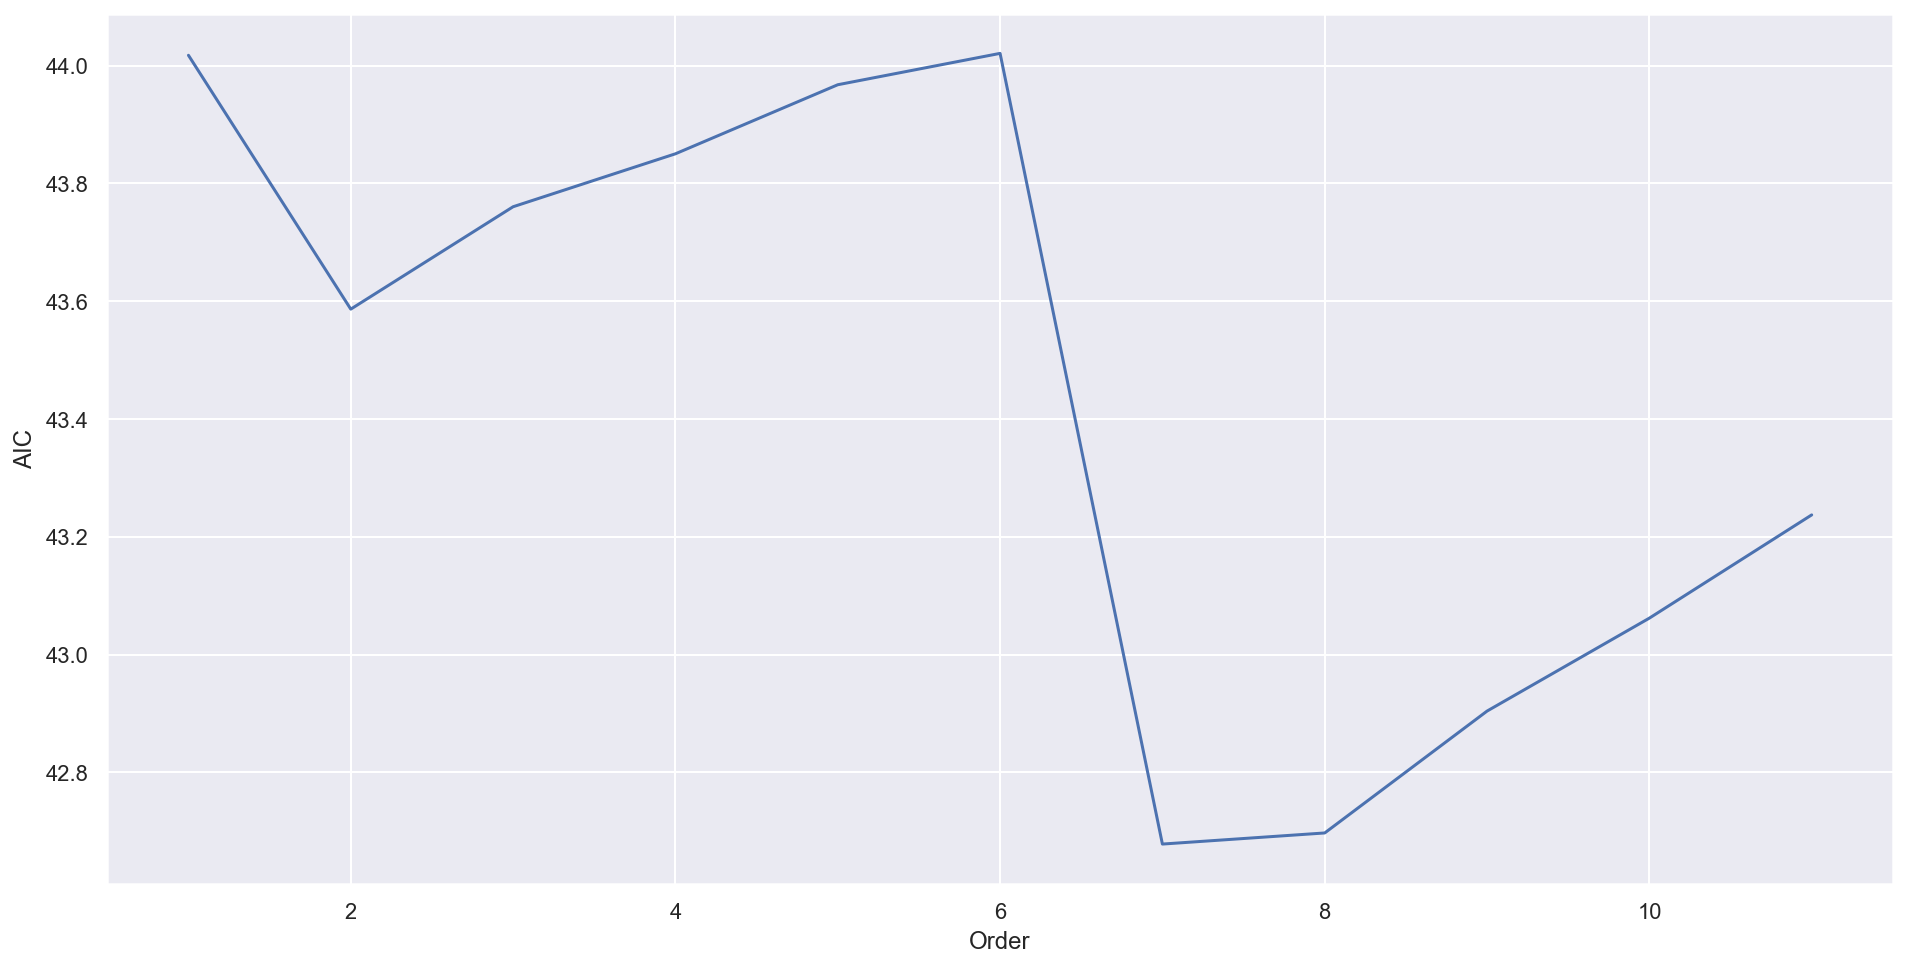

In [154]:
# 시각화
# 감소했다가 증가하는 지점
sns.set()
plt.plot(list(np.arange(1,12,1)), results_aic_gw)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [155]:
# 다른 방법
model = VAR(cab_gw)
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,50.43,50.54,7.983e+21,50.48
1,42.38,43.70*,2.541e+18,42.90*
2,41.95*,44.49,1.657e+18*,42.96
3,42.15,45.90,2.026e+18,43.63
4,42.25,47.22,2.265e+18,44.22
5,42.34,48.52,2.501e+18,44.79
6,42.47,49.87,2.896e+18,45.40
7,42.56,51.17,3.222e+18,45.97
8,42.74,52.56,3.953e+18,46.63
9,42.97,54.01,5.174e+18,47.34


### 전라남도 날씨

In [156]:
forecasting_model_jn = VAR(cab_jn)
results_aic_jn = []
for p in range(1,12):
    results_jn = forecasting_model_jn.fit(p)
    results_aic_jn.append(results_jn.aic)

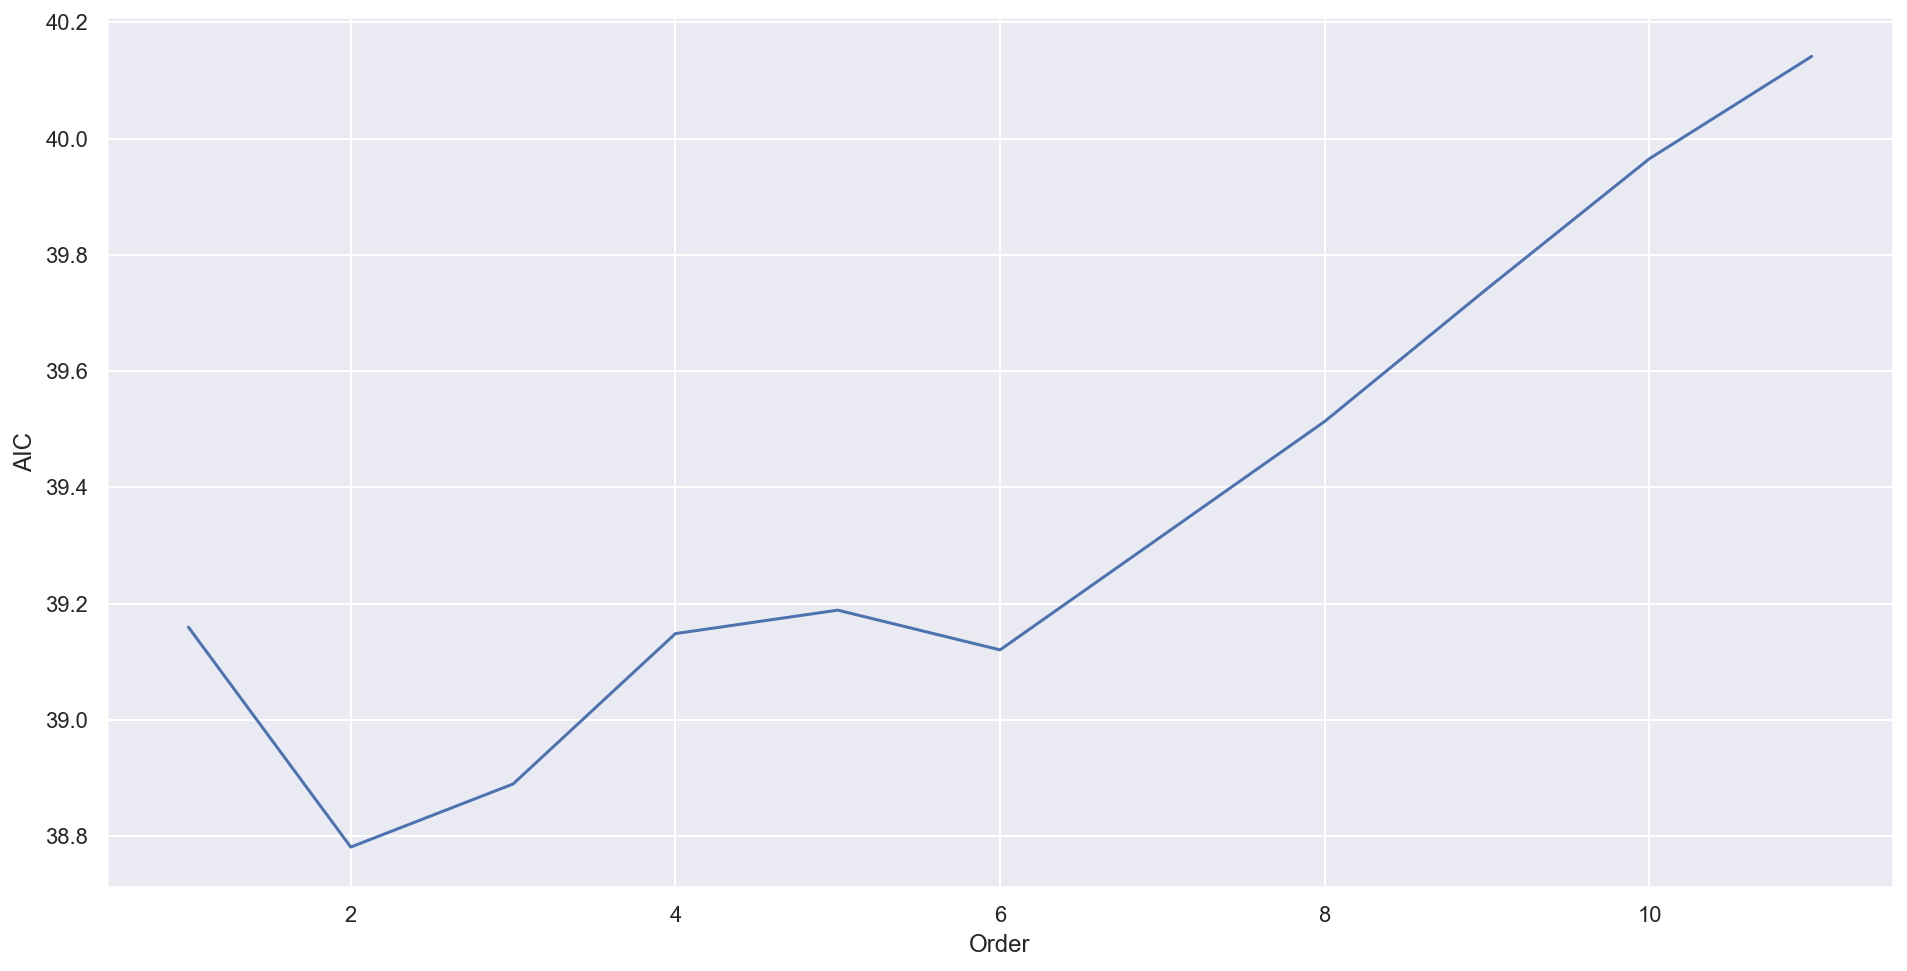

In [157]:
sns.set()
plt.plot(list(np.arange(1,12,1)), results_aic_jn)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [158]:
model = VAR(cab_jn)
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,47.20,47.31,3.138e+20,47.24
1,39.21,40.54*,1.072e+17,39.74*
2,38.85*,41.39,7.465e+16*,39.86
3,38.95,42.70,8.248e+16,40.43
4,39.19,44.15,1.056e+17,41.16
5,39.28,45.46,1.166e+17,41.73
6,39.21,46.61,1.112e+17,42.14
7,39.40,48.01,1.362e+17,42.81
8,39.56,49.39,1.658e+17,43.46
9,39.79,50.82,2.147e+17,44.16


### 가중평균 날씨

In [159]:
forecasting_model_total = VAR(cab_total)
results_aic_total = []
for p in range(1,12):
    results_total = forecasting_model_total.fit(p)
    results_aic_total.append(results_total.aic)

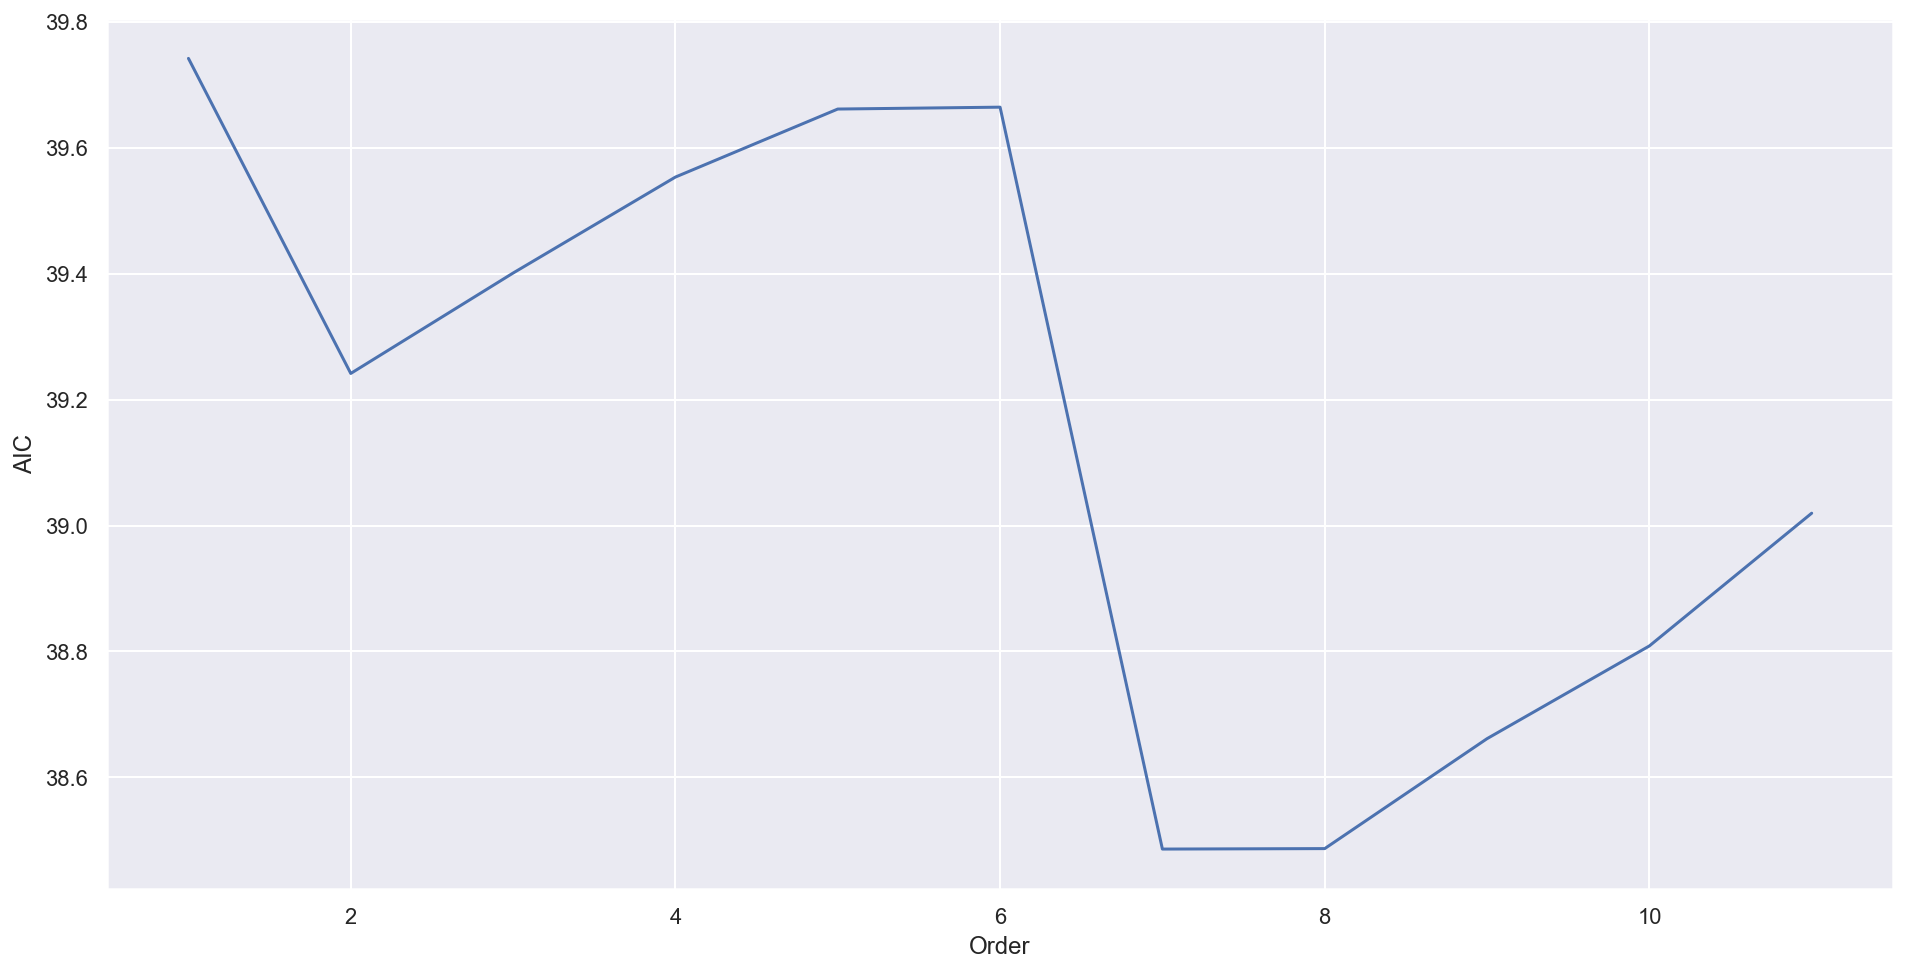

In [160]:
sns.set()
plt.plot(list(np.arange(1,12,1)), results_aic_total)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [161]:
model = VAR(cab_total)
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,46.63,46.74,1.781e+20,46.67
1,38.27,39.60*,4.185e+16,38.80*
2,37.80*,40.33,2.601e+16*,38.80
3,37.96,41.71,3.078e+16,39.45
4,38.12,43.09,3.645e+16,40.09
5,38.26,44.44,4.226e+16,40.71
6,38.33,45.72,4.583e+16,41.26
7,38.44,47.05,5.239e+16,41.85
8,38.55,48.38,6.019e+16,42.44
9,38.73,49.77,7.483e+16,43.10


### 환율

In [72]:
forecasting_model_dollar = VAR(cab_dollar_diff)
results_aic_dollar = []
for p in range(1,12):
    results_dollar = forecasting_model_dollar.fit(p)
    results_aic_dollar.append(results_dollar.aic)

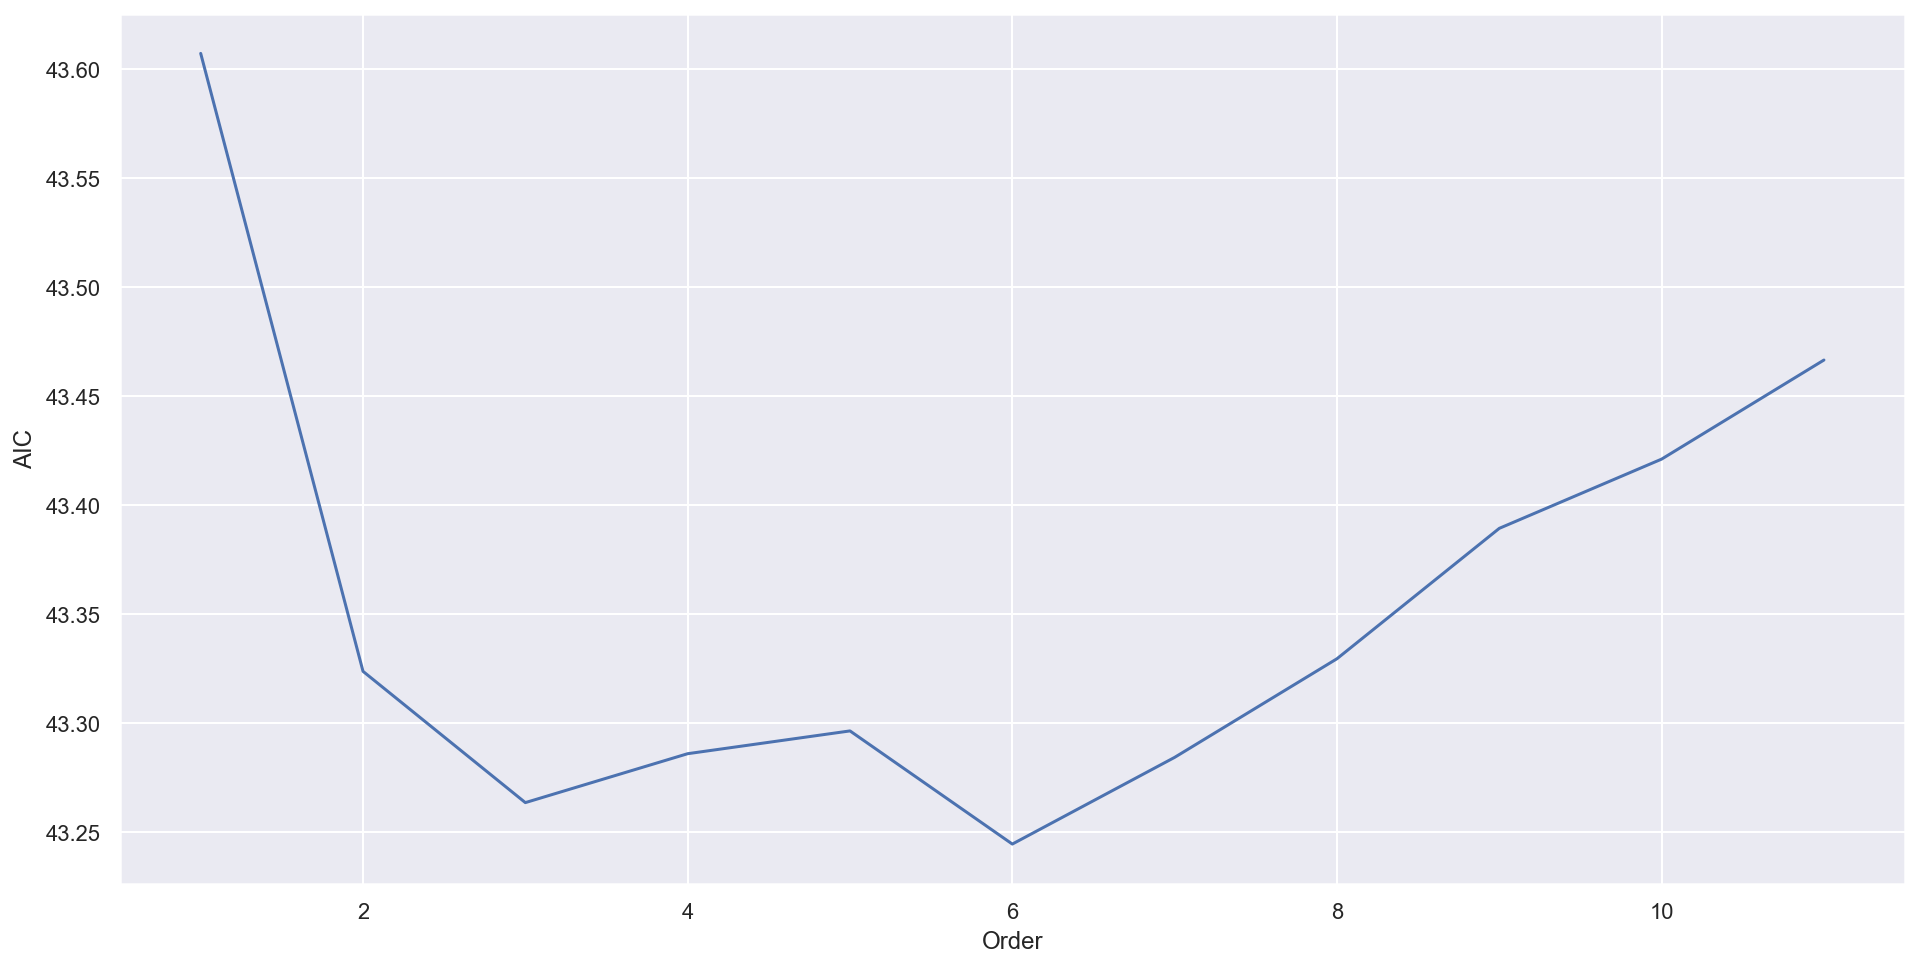

In [73]:
sns.set()
plt.plot(list(np.arange(1,12,1)), results_aic_dollar)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [74]:
model = VAR(cab_dollar_diff)
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,47.65,47.70,4.969e+20,47.67
1,43.69,43.89,9.398e+18,43.77
2,43.39,43.75*,7.002e+18,43.54
3,43.33,43.85,6.548e+18,43.53*
4,43.35,44.03,6.686e+18,43.62
5,43.35,44.20,6.731e+18,43.69
6,43.30*,44.30,6.372e+18*,43.70
7,43.33,44.50,6.582e+18,43.79
8,43.37,44.69,6.833e+18,43.89
9,43.42,44.90,7.188e+18,44.01


## 그레인저 인과검정  
- VAR 모델을 통해 얻은 lag를 이용해 그레인저 인과검정
- 참고: https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2

In [183]:
# 그레인저 인과검정 함수
from statsmodels.tsa.stattools import grangercausalitytests

maxlag = 2 #데이터에 맞게 설정
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

### 강원도 날씨  
평균기온 / 최저기온 / 평균이슬점온도 / 합계일사량

In [76]:
grangers_causation_matrix(cab_gw, variables = cab_gw.columns)

,TOT_QTY_x,PER_PRICE_x,평균기온(°C)_x,최저기온(°C)_x,최고기온(°C)_x,일강수량(mm)_x,평균 이슬점온도(°C)_x,평균 상대습도(%)_x,합계 일사량(MJ/m2)_x,일 최심적설(cm)_x,평균 지면온도(°C)_x
TOT_QTY_y,1.0000,0.1135,0.0021,0.0028,0.0012,0.0763,0.0026,0.0307,0.6661,0.2156,0.0018
PER_PRICE_y,0.5417,1.0000,0.0392,0.0039,0.1145,0.0000,0.0126,0.0180,0.0019,0.7869,0.0625
평균기온(°C)_y,0.0000,0.1376,1.0000,0.0002,0.0309,0.4501,0.0000,0.0000,0.0000,0.0862,0.0000
최저기온(°C)_y,0.0000,0.0522,0.0000,1.0000,0.0000,0.1045,0.0000,0.0000,0.0000,0.1842,0.0000
최고기온(°C)_y,0.0000,0.4595,0.0676,0.2612,1.0000,0.1698,0.0151,0.0006,0.0000,0.0503,0.0000
일강수량(mm)_y,0.4551,0.0098,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0001,0.1406,0.0000
평균 이슬점온도(°C)_y,0.0000,0.2444,0.0000,0.0000,0.0000,0.2394,1.0000,0.0000,0.0000,0.1006,0.0000
평균 상대습도(%)_y,0.4426,0.0260,0.0000,0.0000,0.0000,0.0797,0.0000,1.0000,0.0000,0.0052,0.0000
합계 일사량(MJ/m2)_y,0.0014,0.8444,0.0011,0.0005,0.0056,0.0000,0.0007,0.0003,1.0000,0.6860,0.0025
일 최심적설(cm)_y,0.4468,0.3404,0.0089,0.0180,0.0048,0.3252,0.0153,0.1814,0.0245,1.0000,0.0149


### 전라남도 날씨  
평균기온 / 최저기온 / 평균이슬점온도 / 평균상대습도 / 합계 일사량 / 평균 지면온도 

In [77]:
grangers_causation_matrix(cab_jn, variables = cab_jn.columns)

,TOT_QTY_x,PER_PRICE_x,평균기온(°C)_x,최저기온(°C)_x,최고기온(°C)_x,일강수량(mm)_x,평균 이슬점온도(°C)_x,평균 상대습도(%)_x,합계 일사량(MJ/m2)_x,일 최심적설(cm)_x,평균 지면온도(°C)_x
TOT_QTY_y,1.0000,0.1135,0.0016,0.0039,0.0011,0.4683,0.0131,0.0575,0.5066,0.2001,0.0018
PER_PRICE_y,0.5417,1.0000,0.0411,0.0032,0.1043,0.0000,0.0029,0.0005,0.0239,0.6514,0.0379
평균기온(°C)_y,0.0000,0.0723,1.0000,0.0837,0.1535,0.3564,0.0000,0.0000,0.0000,0.0007,0.0000
최저기온(°C)_y,0.0000,0.0528,0.0000,1.0000,0.0000,0.0286,0.0000,0.0000,0.0000,0.0170,0.0000
최고기온(°C)_y,0.0000,0.1985,0.0003,0.0010,1.0000,0.1048,0.4687,0.2319,0.0000,0.0003,0.0000
일강수량(mm)_y,0.2351,0.0069,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0620,0.0000
평균 이슬점온도(°C)_y,0.0000,0.1587,0.0000,0.0000,0.0000,0.0159,1.0000,0.0000,0.0000,0.3160,0.0000
평균 상대습도(%)_y,0.3810,0.2633,0.0000,0.0000,0.0000,0.4161,0.0000,1.0000,0.0000,0.0423,0.0000
합계 일사량(MJ/m2)_y,0.0001,0.7423,0.0002,0.0001,0.0014,0.0000,0.0000,0.0000,1.0000,0.1402,0.0003
일 최심적설(cm)_y,0.1232,0.1075,0.0002,0.0007,0.0001,0.1694,0.0008,0.0997,0.0005,1.0000,0.0002


### 가중평균 날씨  
평균기온 / 평균이슬점온도 / 평균 상대습도 / 합계 일사량 / 평균 지면온도

In [184]:
grangers_causation_matrix(cab_total, variables = cab_total.columns)

,TOT_QTY_x,PER_PRICE_x,평균기온(°C)_x,최저기온(°C)_x,최고기온(°C)_x,일강수량(mm)_x,평균 이슬점온도(°C)_x,평균 상대습도(%)_x,합계 일사량(MJ/m2)_x,일 최심적설(cm)_x,평균 지면온도(°C)_x
TOT_QTY_y,1.0000,0.0000,0.0011,0.0004,0.0009,0.0000,0.0013,0.0078,0.0916,0.1754,0.0007
PER_PRICE_y,0.5417,1.0000,0.0010,0.0011,0.0008,0.0000,0.0061,0.0025,0.0020,0.7563,0.0008
평균기온(°C)_y,0.0000,0.0999,1.0000,0.0000,0.0000,0.0034,0.0000,0.0000,0.0000,0.0001,0.0000
최저기온(°C)_y,0.0000,0.0470,0.0000,1.0000,0.0000,0.0109,0.0000,0.0000,0.0000,0.0036,0.0000
최고기온(°C)_y,0.0000,0.3216,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0000
일강수량(mm)_y,0.2007,0.0003,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0795,0.0000
평균 이슬점온도(°C)_y,0.0000,0.1955,0.0000,0.0000,0.0000,0.0306,1.0000,0.0000,0.0000,0.0036,0.0000
평균 상대습도(%)_y,0.0250,0.0831,0.0000,0.0000,0.0000,0.0741,0.0000,1.0000,0.0000,0.0277,0.0000
합계 일사량(MJ/m2)_y,0.0001,0.0095,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.1679,0.0000
일 최심적설(cm)_y,0.0002,0.0468,0.0000,0.0000,0.0000,0.1713,0.0000,0.0086,0.0002,1.0000,0.0000


### 환율

In [78]:
grangers_causation_matrix(cab_dollar_diff, variables = cab_dollar_diff.columns)

,TOT_QTY_x,PER_PRICE_x,매매기준율_x,직전대비_x
TOT_QTY_y,1.0000,0.1139,0.4510,0.5315
PER_PRICE_y,0.5398,1.0000,0.4642,0.6122
매매기준율_y,0.4978,0.2366,1.0000,0.0000
직전대비_y,0.4465,0.2051,0.0655,1.0000


# 정리  
- 높은 상관관계와 그레인저 인과검정이 유의미한 피처만 선택  
- 배추  
    - 강원도: 평균기온(°C) / 최저기온(°C) / 평균 이슬점온도(°C)
    - 전라남도: 평균기온(°C) / 최저기온(°C) / 평균 이슬점온도(°C) / 평균 상대습도(%) / 평균 지면온도(°C)  
    - 환율: X

# VAR 모델

In [185]:
cab_total.head()

,TOT_QTY,PER_PRICE,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),합계 일사량(MJ/m2),일 최심적설(cm),평균 지면온도(°C)
일시,,,,,,,,,,,
2014-01-06,1555569.0,437.672099,1.963410,-2.712256,7.406103,0.704648,-6.244192,59.051628,8.911105,1.500194,1.099500
2014-01-13,2329475.0,377.733957,-1.456989,-6.070264,3.403868,0.447588,-10.270000,54.869187,8.774990,1.381929,-1.023681
2014-01-20,2375485.0,352.779142,-1.415758,-6.506560,4.021473,0.257134,-9.328978,58.603209,9.491230,0.405250,-1.237011
2014-01-27,2835079.0,346.465248,0.633495,-4.600462,5.985330,1.591150,-5.572440,67.250099,9.400347,4.966062,0.898253
2014-02-03,917948.0,402.316199,4.426110,-1.263330,9.805538,1.974447,-2.225648,67.333055,8.267305,0.403810,3.546495


In [186]:
df = cab_total[['PER_PRICE','평균기온(°C)','최고기온(°C)', '평균 이슬점온도(°C)','평균 상대습도(%)','평균 지면온도(°C)']]

In [187]:
nobs = 8
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(401, 6)
(8, 6)


In [188]:
model = VAR(df_train)

In [189]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,16.01,16.07,8.995e+06,16.04
1,9.917,10.35,2.028e+04,10.09
2,9.508,10.30*,1.347e+04,9.823*
3,9.478,10.64,1.308e+04,9.939
4,9.487,11.02,1.321e+04,10.09
5,9.487,11.38,1.322e+04,10.24
6,9.426*,11.69,1.245e+04*,10.32
7,9.448,12.08,1.275e+04,10.49
8,9.486,12.48,1.328e+04,10.67
9,9.545,12.91,1.413e+04,10.88


In [190]:
model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Nov, 2021
Time:                     23:33:04
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    11.6155
Nobs:                     395.000    HQIC:                   10.2652
Log likelihood:          -4993.28    FPE:                    11879.1
AIC:                      9.37923    Det(Omega_mle):         6941.68
--------------------------------------------------------------------
Results for equation PER_PRICE
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                 719.337389       848.363355            0.848           0.396
L1.PER_PRICE            1.223710         0.052090           23.492           0.000
L1.평균기온(°C)           -34.659228        25.44764

In [191]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

PER_PRICE : 2.05
평균기온(°C) : 2.08
최고기온(°C) : 2.08
평균 이슬점온도(°C) : 2.03
평균 상대습도(%) : 2.0
평균 지면온도(°C) : 2.08


In [192]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
forecast_input

6


array([[662.23395385,  27.20172606,  32.30125118,  23.2058752 ,
         80.72370801,  33.12803375],
       [828.0625366 ,  26.81329906,  31.76189874,  22.74310911,
         80.14599451,  30.67062794],
       [668.45544327,  24.23369466,  28.54210047,  20.41920644,
         80.79451727,  27.70608163],
       [640.4344564 ,  23.43171036,  27.47675275,  20.02630207,
         82.86595997,  26.08352119],
       [681.0360128 ,  23.73906842,  27.67851413,  21.15739927,
         86.8489134 ,  25.34838776],
       [788.63088608,  21.57665385,  25.25185165,  18.21727943,
         82.80944584,  23.66883752]])

In [193]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns)
df_forecast

,PER_PRICE,평균기온(°C),최고기온(°C),평균 이슬점온도(°C),평균 상대습도(%),평균 지면온도(°C)
일시,,,,,,
2021-09-13,783.858329,20.114167,24.381625,16.678790,81.156861,22.458873
2021-09-20,795.473422,19.463295,23.911284,15.831226,80.488013,21.743855
2021-09-27,787.738297,18.460788,23.098637,14.319488,78.477426,20.778078
2021-10-04,793.130180,16.545494,21.203015,11.999504,76.613926,18.784961
2021-10-11,790.171977,15.081257,19.982424,10.380881,75.595995,16.954412
2021-10-18,796.237992,13.582902,18.462787,8.819229,74.891798,15.204012
2021-10-25,783.350941,12.546641,17.558632,7.405379,73.433788,13.840248
2021-11-01,762.213621,11.207708,16.259839,5.796571,72.202926,12.272907


In [194]:
df_test

,PER_PRICE,평균기온(°C),최고기온(°C),평균 이슬점온도(°C),평균 상대습도(%),평균 지면온도(°C)
일시,,,,,,
2021-09-13,916.944127,21.906437,26.706316,18.531480,82.898509,24.392476
2021-09-20,1025.123920,21.253062,25.769814,16.887518,78.028684,23.706804
2021-09-27,730.760696,20.464633,25.187121,16.239666,78.533447,22.130553
2021-10-04,571.002217,20.915030,26.021499,17.436075,82.736503,22.578832
2021-10-11,476.682401,19.974692,24.158105,17.543523,87.269183,21.522139
2021-10-18,407.538529,14.514516,19.391818,9.034996,72.553117,16.488898
2021-10-25,523.348062,10.269002,16.980102,4.451316,70.866015,12.133025
2021-11-01,551.336593,12.047176,19.230488,6.139197,71.037432,12.653363


In [195]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5
    return({'rmse':rmse})

In [196]:
print('Forecast Accuracy of: P_PRICE')
accuracy_prod = forecast_accuracy(df_forecast['PER_PRICE'].values, df_test['PER_PRICE'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: P_PRICE
rmse :  246.0874


In [197]:
# 총 물량 & 단위 당 가격 시각화
fig = make_subplots()

fig.add_trace(go.Scatter(x=cab_week.index, y=df_forecast['PER_PRICE'], name='예측값'))
fig.add_trace(go.Scatter(x=cab_week.index, y=df_test['PER_PRICE'], name='실제값'))

# Set y-axes titles

fig.update_layout(title_text='배추 - 총 물량 & 단위 가격')

fig.show()